<img src="../holberton_logo.png" alt="logo" width="500"/>

# Classification of Hand Written Digits
This example shows how to build a feed forward neural network that can be used to recognize images of hand-written digits, from 0-9.

Our workflow will consist of the following steps
- import libraries needed to compile and train the neural network and visualize data
- get the MNIST dataset of handwritten digits
- preprocess the data
- split the dataset into data used for training and testing
- build the neural network
- train the neural network
- test the neural network by showcasing the classification for some random instances



## Import libraries
- tensorflow
- keras
- matplotlib

In [1]:
# Let's import the libraries we'll need
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## 1. Load the MNIST dataset

The MNIST dataset consists of `70,000` grayscale images of handwritten digits (`0-9`) with a resolution of `28x28` pixels. It is split into:

- **Training set*``* 600``00 images (`x_train`) with corresponding labels (`y_train`).
- **Test st:``** 0,``000 images (`x_test`) with corresponding labels (`y_test`).

Each image is represented as a **28x28 NumPy array**, and the labels are integers from 0 to 9.

In [3]:
# Now, let's load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
y_train[987]

4

## Exploring the Dataset Structure

Let's check the shape of the dataset and visualize some samples.

In [7]:
# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


### Understanding MNIST Data Format

Each image in the dataset is stored as a **28x28 NumPy array** with pixel values ranging from 0 to 255.  
The labels are integers (0-9) representing the corresponding digit.

Let's examine one training image and its label.


In [9]:
# Print a single image array and its label
print("Sample Image Array:\n", x_train[0]) 
print("\nLabel:", y_train[0])  

Sample Image Array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 2

We explore the dataset by displaying sample images along with their labels, helping to understand the data distribution and structure.

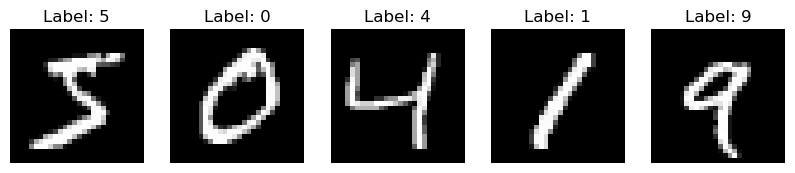

In [11]:
# Display some images with labels
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()

## 2. Preprocess the data

### 2.1 Data Normalization

Pixel values in the MNIST dataset range from **0 to 255** (grayscale intensity).  
To improve model performance and training stability, we scale the values to a **0-1 range** by dividing by 255.  
This helps neural networks converge faster and perform bettCode:


In [13]:
# Next, we'll preprocess the data by scaling it to a range of 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

### 2.2 Split the dataset in train, validation and test dataset

To fine-tune our model, we split the dataset into three parts:  

- **Training set**: Used to train the model (remaining 55,000 images).  
- **Validation set**: A small subset (5,000 images) used to evaluate performance during training and adjust hyperparameters.  
- **Test set**: Separate (10,000 images) used for final model evaluation.

We extract the first **5,000 images** from the training set for validation and keep the rest for training.

In [15]:
# now, we will split the dataset in train, validation and test dataset
x_val = x_train[:5000] # validation dataset
x_train = x_train[5000:] # train dataset
y_val = y_train[:5000] # validation labels
y_train = y_train[5000:] # train labels

## 3. Build Neural Network 


We use a **Sequential** model, which stacks layers in order. The architecture consists of:

1. **Flatten Layer**: Converts the **28×28** image into a **1D array of 784 values**, making it suitable for a fully connected network.  
2. **Dense Layer (Hidden Layer)**: A fully connected layer with **128 neurons** and **ReLU activation**, which helps learn complex patterns.  
3. **Output Layer**: A **Dense layer with 10 neurons** (one for each digit 0-9) and **softmax activation**, which outputs class proities of babilhandwritten digCode:


## Understanding the Neural Network Architecture

Our model follows a **feedforward neural network** structure with three key layers. Each plays a crucial role in transforming the input data into meaningful predictions.

### 1. **Flatten Layer (`Flatten(input_shape=(28, 28))`)**  
   - **Role**: Converts the **2D (28×28)** image into a **1D (784 values)** array.  
   - **Intuition**: Fully connected (Dense) layers require a 1D input, so we reshape the pixel grid into a single vector while preserving the pixel values.

### 2. **Hidden Dense Layer (`Dense(128, activation='relu')`)**  
   - **Role**: A fully connected layer with **128 neurons** that learns hierarchical features.  
   - **Intuition**:  
     - Each neuron processes different aspects of the input.  
     - The **ReLU activation function (`max(0, x)`)** introduces non-linearity, helping the model learn complex patterns.  
     - The number **128** is a hyperparameter that can be adjusted for performance.

### 3. **Output Layer (`Dense(10, activation='softmax')`)**  
   - **Role**: Produces the final classification output with **10 neurons** (one per digit).  
   - **Intuition**:  
     - Each neuron corresponds to a digit (0-9).  
     - The **softmax activation function** converts raw scores into **probabilities**, ensuring that the outputs sum to 1.  
     - The model predicts the class with the highest probability.



In [18]:
# Now, let's define our neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # flatten the image to 1D array
    keras.layers.Dense(256, activation='tanh'),  # first dense layer with 128 neurons and relu activation
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),  # first dense layer with 128 neurons and relu activation
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),  # first dense layer with 128 neurons and relu activation
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax') # output layer with 10 neurons (one for each class) and softmax activation
])

C:\Users\evisp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile the model


Before training, we need to **compile** the model by specifying:

1. **Optimizer (`adam`)**  
   - **Role**: Adjusts model weights to minimize errors during training.  
   - **Why Adam?** Combines momentum and adaptive learning rates for **efficient** and **robust** optimization.  

2. **Loss Function (`sparse_categorical_crossentropy`)**  
   - **Role**: Measures the difference between predicted probabilities and actual labels.  
   - **Why Sparse?** Suitable for integer labels (0-9) instead of one-hot encoding.  

3. **Evaluation Metric (`accuracy`)**  
   - **Role**: Tracks how often predictions match the tpilation Code:


In [21]:
# Now, let's compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 5. Train the model


To train the model, we use the **`fit`** method, which performs the following:

1. **Training Data (`x_train`, `y_train`)**  
   - The input images and corresponding labels used for model training.

2. **Epochs (`epochs=5`)**  
   - The number of times the entire training dataset is passed through the model.  
   - In this case, we train the model for **5 epochs**, allowing the model to learn and improve iteratively.

3. **Validation Data (`validation_data=(x_val, y_val)`)**  
   - A separate dataset used to evaluate the model after each epoch, helping monitor **overfitting**.

4. **History**  
   - The **`history`** object stores training and validation metrics (like loss and accuracy) for later analysis or # Training Code:


In [23]:
# Now, let's train the model, and also save the history of training and validation
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8743 - loss: 0.4453 - val_accuracy: 0.9632 - val_loss: 0.1333
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9636 - loss: 0.1276 - val_accuracy: 0.9748 - val_loss: 0.0962
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9763 - loss: 0.0804 - val_accuracy: 0.9736 - val_loss: 0.0873
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9822 - loss: 0.0609 - val_accuracy: 0.9766 - val_loss: 0.0810
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9856 - loss: 0.0453 - val_accuracy: 0.9770 - val_loss: 0.0783


## 6. Evaluating the Model

After training, we evaluate the model on the **test set** to determine how well it generalizes to unseen data.

1. **Test Data (`x_test`, `y_test`)**  
   - The **test set** is used to assess the model's performance after training, ensuring the model isn't overfitting to the training data.

2. **Test Loss and Accuracy**  
   - **Loss**: Measures the error between predicted and true labels on the test data.  
   - **Accuracy**: Indicates the proportion of correct predictions made by ttion Code:


In [25]:
# Now, let's evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0890
Test accuracy: 0.9779999852180481


## Visualize data
- use `matplotlib.pyplot` to plot the training and validation accuracy and loss
- display the number of epochs and the accuracy

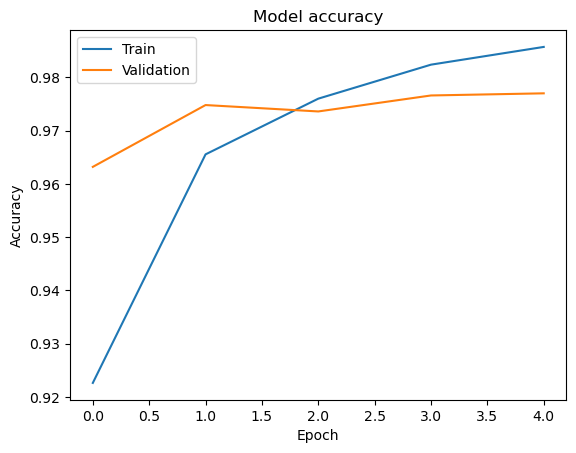

In [27]:
# Now, let's plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

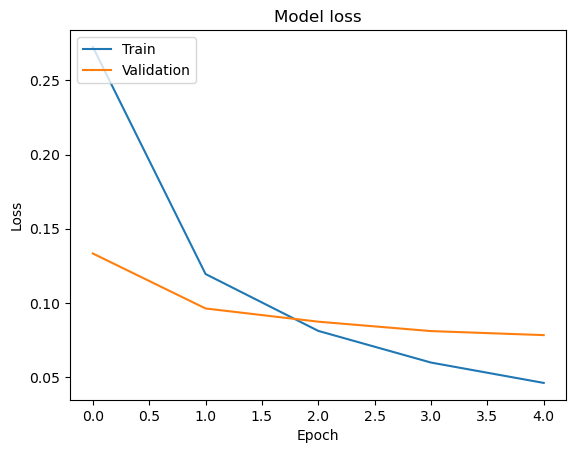

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show


## Confusion Matrix

A **confusion matrix** helps to visualize the performance of the model by showing the actual versus predicted classifications. It provides insights into which digits the model struggles with.

- **Diagonal elements** represent correct predictions.
- **Off-diagonal elements** show misclassifications.

We will generate the confusion matrix using `sklearn.metrics.confusion_matrix`, which compares the predicted labels with the true labels.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


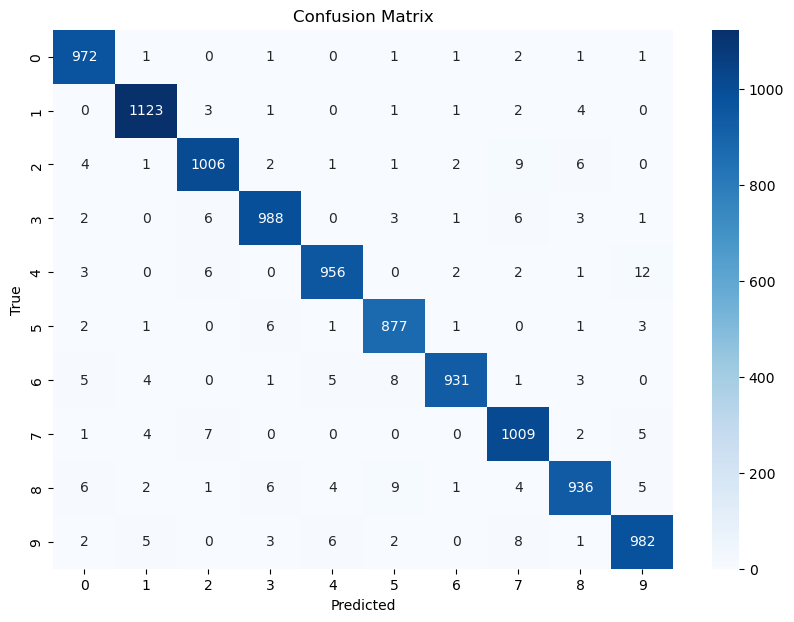

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Visualize the classification of several images
- select 20 images at random from the entire dataset
- visualize the images alongside their labels in a grid-like plot

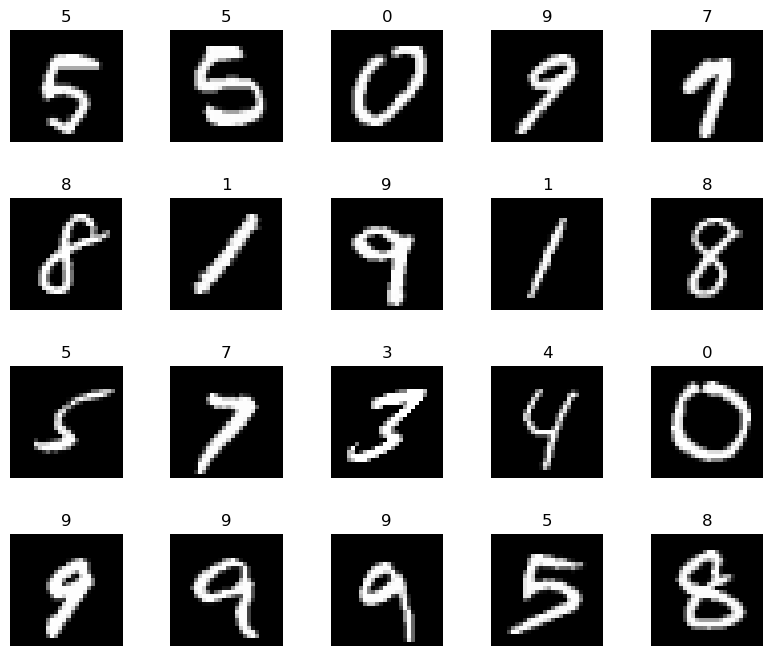

In [32]:
import numpy as np
random_indices = np.random.randint(0, len(x_train), 20)
random_images = x_train[random_indices]
random_labels = y_train[random_indices]

fix, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()

for i, ax in enumerate(axes):
  ax.imshow(random_images[i], cmap='gray')
  ax.axis("off")
  ax.set_title(str(random_labels[i]))

plt.subplots_adjust(hspace=0.5)
plt.show()

## Congrats on building your *first* neural network